In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime

# Loading  the dataset
df = pd.read_csv("au-bank.csv")  # Replace with your actual file path

df['date'] = pd.to_datetime(df['date'])

# Sorting by date 
df = df.sort_values('date').reset_index(drop=True)

# Price-Based Features 
df['return_1d'] = (df['close'] - df['prev_close']) / df['prev_close']
df['hl_range'] = df['high'] - df['low']
df['oc_range'] = df['close'] - df['open']
df['volatility'] = (df['high'] - df['low']) / df['open']

# Rolling Features  (Moving Averages)
df['ma_5'] = df['close'].rolling(window=5).mean()
df['ma_20'] = df['close'].rolling(window=20).mean()
df['ma_50'] = df['close'].rolling(window=50).mean()

# Rolling Standard Deviation (Volatility Proxy)
df['std_5'] = df['close'].rolling(window=5).std()
df['std_20'] = df['close'].rolling(window=20).std()

# RSI (Relative Strength Index) 
def compute_rsi(series, window=14):
    delta = series.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

df['rsi_14'] = compute_rsi(df['close'])

# MACD 
ema_12 = df['close'].ewm(span=12, adjust=False).mean()
ema_26 = df['close'].ewm(span=26, adjust=False).mean()
df['macd'] = ema_12 - ema_26
df['signal_line'] = df['macd'].ewm(span=9, adjust=False).mean()

#  Volume-Based Features 
df['volume_change'] = df['volume'].pct_change()
df['avg_volume_5'] = df['volume'].rolling(window=5).mean()
df['volume_ratio'] = df['volume'] / df['avg_volume_5']
df['vwap_deviation'] = (df['close'] - df['vwap']) / df['vwap']

# Time-Based Features 
df['day_of_week'] = df['date'].dt.dayofweek
df['month'] = df['date'].dt.month
df['quarter'] = df['date'].dt.quarter

# Direction (Target Variable)
df['direction'] = (df['close'] > df['prev_close']).astype(int)

# Dropping row with NaN from rolling windows
df = df.dropna().reset_index(drop=True)

# Save the feature-engineered dataset
df.to_csv("banknifty_feature_engineered.csv", index=False)

print("✅ Feature engineering completed and dataset saved.")


✅ Feature engineering completed and dataset saved.


In [3]:
df = pd.read_csv("banknifty_feature_engineered.csv")
df = df.drop_duplicates(subset='date', keep='first')


In [5]:
df.tail()

,date,open,high,low,prev_close,ltp,close,vwap,52w_high,52w_low,...,macd,signal_line,volume_change,avg_volume_5,volume_ratio,vwap_deviation,day_of_week,month,quarter,direction
1204,2024-12-24,547.00,557.60,543.00,549.20,555.05,556.15,551.62,813.4,534.45,...,-15.069421,-13.061158,0.253899,2017644.2,1.113137,0.008212,1,12,4,1
1205,2024-12-26,554.60,557.85,546.20,556.15,547.25,548.30,549.34,813.4,534.45,...,-15.259544,-13.500835,-0.508407,1993855.4,0.553739,-0.001893,3,12,4,0
1206,2024-12-27,548.75,554.55,547.25,548.30,552.00,552.20,551.49,813.4,534.45,...,-14.923492,-13.785366,-0.564171,1624454.0,0.296215,0.001287,4,12,4,1
1207,2024-12-30,552.00,591.50,546.55,552.20,563.25,577.20,568.60,813.4,534.45,...,-12.495833,-13.527460,12.419019,2415878.8,2.672763,0.015125,0,12,4,1
1208,2024-12-31,561.95,563.90,546.55,577.20,559.00,559.10,558.18,813.4,534.45,...,-11.895293,-13.201026,-0.478559,2731046.4,1.232855,0.001648,1,12,4,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1199 entries, 0 to 1208
Data columns (total 33 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            1199 non-null   object 
 1   open            1199 non-null   float64
 2   high            1199 non-null   float64
 3   low             1199 non-null   float64
 4   prev_close      1199 non-null   float64
 5   ltp             1199 non-null   float64
 6   close           1199 non-null   float64
 7   vwap            1199 non-null   float64
 8   52w_high        1199 non-null   float64
 9   52w_low         1199 non-null   float64
 10  volume          1199 non-null   int64  
 11  value           1199 non-null   int64  
 12  no_of_trades    1199 non-null   int64  
 13  return_1d       1199 non-null   float64
 14  hl_range        1199 non-null   float64
 15  oc_range        1199 non-null   float64
 16  volatility      1199 non-null   float64
 17  ma_5            1199 non-null   float6

## **Naviee Bayes Model**
## **Gaussian NB Model**

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.89      0.92       117
           1       0.90      0.95      0.93       125

    accuracy                           0.92       242
   macro avg       0.92      0.92      0.92       242
weighted avg       0.92      0.92      0.92       242

Accuracy: 0.9214876033057852


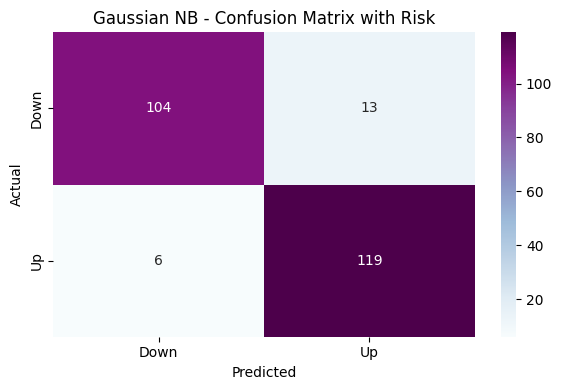


Risk Level Distribution:
Risk_Level
High Risk (Low Confidence)    114
Low Risk (High Confidence)    114
Medium Risk                    14
Name: count, dtype: int64


C:\Users\jainu\AppData\Local\Temp\ipykernel_20692\152435163.py:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=risk_df, x='Risk_Level', palette='coolwarm', order=risk_df['Risk_Level'].value_counts().index)


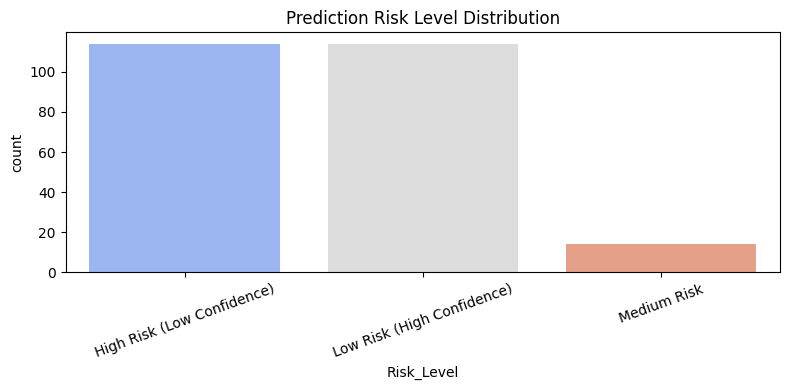


Top 10 Low Risk (High Confidence) Predictions:
            Date  True_Label  Predicted_Label  Predicted_Prob_Up  \
1005  2024-03-04           1                1           0.997573   
736   2023-02-02           1                1           0.998163   
601   2022-07-19           1                1           0.993668   
357   2021-07-27           1                1           0.988048   
794   2023-05-03           1                1           0.912793   
308   2021-05-18           1                1           0.999852   
408   2021-10-08           1                1           0.923703   
949   2023-12-14           1                1           0.999733   
84    2020-06-24           1                1           0.999056   
311   2021-05-21           1                1           0.993915   

                      Risk_Level  
1005  Low Risk (High Confidence)  
736   Low Risk (High Confidence)  
601   Low Risk (High Confidence)  
357   Low Risk (High Confidence)  
794   Low Risk (High Confide

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv("banknifty_feature_engineered.csv") 

# Dropping missing values
df = df.dropna()

# Defining features and target
features = ['return_1d', 'hl_range', 'oc_range', 'volatility', 'ma_5', 'ma_20', 'ma_50',
            'std_5', 'std_20', 'rsi_14', 'macd', 'signal_line', 'volume_change',
            'volume_ratio', 'vwap_deviation', 'day_of_week', 'month', 'quarter']
X = df[features]
y = df['direction']

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

# Train Gaussian Naive Bayes model
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Predict
y_pred = gnb.predict(X_test)
y_prob = gnb.predict_proba(X_test)[:, 1]  # Probability of class "Up" (1)

# Basic Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='BuPu', 
            xticklabels=["Down", "Up"], yticklabels=["Down", "Up"])
plt.title("Gaussian NB - Confusion Matrix with Risk")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


# Risk Modeling Implementation

# Define thresholds
def classify_risk(prob):
    if prob >= 0.80:
        return "Low Risk (High Confidence)"
    elif prob >= 0.60:
        return "Medium Risk"
    else:
        return "High Risk (Low Confidence)"

# Risk Modeling DataFrame
risk_df = pd.DataFrame({
    'Date': df['date'].iloc[y_test.index],
    'True_Label': y_test.values,
    'Predicted_Label': y_pred,
    'Predicted_Prob_Up': y_prob
})

risk_df['Risk_Level'] = risk_df['Predicted_Prob_Up'].apply(classify_risk)

# Show summary
print("\nRisk Level Distribution:")
print(risk_df['Risk_Level'].value_counts())

# Plot Risk Distribution
plt.figure(figsize=(8, 4))
sns.countplot(data=risk_df, x='Risk_Level', palette='coolwarm', order=risk_df['Risk_Level'].value_counts().index)
plt.title("Prediction Risk Level Distribution")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

# Show top 10 high confidence predictions
print("\nTop 10 Low Risk (High Confidence) Predictions:")
print(risk_df[risk_df['Risk_Level'] == "Low Risk (High Confidence)"].head(10))
